# MetroBikes Linear Regression Analysis

## Contents

### 1. Import libraries and data

### 2. Clean the data

### 3. Preliminary Relationship Analysis

###  4. Linear Regression Analysis

## 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import cleaned bike data
bikes = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Short Trips Merge.csv')

In [3]:
# list the table columns
bikes.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Trip ID', 'Membership or Pass Type',
       'Bicycle ID', 'Bike Type', 'Checkout Datetime', 'Checkout Date',
       'Checkout Time', 'Checkout Kiosk ID', 'Checkout Kiosk',
       'Checkout Kiosk Status', 'Checkout Location',
       'Checkout City Asset Number', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',
       'Return Kiosk ID', 'Return Kiosk', 'Return Kiosk Status',
       'Return Location', 'Return City Asset Number', 'Return Number of Docks',
       'Return Council District'],
      dtype='object')

In [4]:
# check the table
bikes.head()

,Unnamed: 0.1,Unnamed: 0,Trip ID,Membership or Pass Type,Bicycle ID,Bike Type,Checkout Datetime,Checkout Date,Checkout Time,Checkout Kiosk ID,...,Trip Duration Minutes,Month,Year,Return Kiosk ID,Return Kiosk,Return Kiosk Status,Return Location,Return City Asset Number,Return Number of Docks,Return Council District
0,0,0,16459203,Local365,37,classic,2017-12-01 09:51:41,2017-12-01,09:51:41,2496,...,3,12,2017,2495,4th & Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
1,1,1,4106422,Local365,971,classic,2015-03-13 16:20:24,2015-03-13,16:20:24,2495,...,14,3,2015,2495,4th/Congress,active,"(30.26634, -97.74378)",16726.0,15.0,9.0
2,2,2,3454605,Local365,29,classic,2014-10-14 08:33:54,2014-10-14,08:33:54,2712,...,22,10,2014,2575,Riverside/South Lamar,active,"(30.26446, -97.75665)",16736.0,15.0,5.0
3,3,3,3454592,Local365,646,classic,2014-10-14 08:32:03,2014-10-14,08:32:03,2552,...,29,10,2014,2496,8th/Congress,active,"(30.2698, -97.74186)",16725.0,14.0,9.0
4,4,4,4106421,24 Hour Walk Up Pass,124,classic,2015-03-13 16:20:15,2015-03-13,16:20:15,2498,...,10,3,2015,2549,South 1st/Riverside @ Long Center,active,"(30.25941, -97.74971)",16750.0,13.0,9.0


## 2. Clean the data

In [16]:
# check for missing values in Checkout Number of Docks
bikes['Checkout Number of Docks'].isnull().sum()

130383

In [21]:
# check for missing values in trip lengths
bikes['Trip Duration Minutes'].isnull().sum()

0

In [17]:
# drop rows with missing Checkout Dock Numbers
CODocks_full = bikes.dropna(subset = ['Checkout Number of Docks'])
CODocks_full['Checkout Number of Docks'].isnull().sum()

In [37]:
# create dataframe with only variables containing numeric values
suba_num = CODocks_full.select_dtypes(include=['float64', 'int64'])

In [38]:
# list columns for new table
suba_num.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Trip ID', 'Checkout Kiosk ID',
       'Checkout City Asset Number', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',
       'Return Kiosk ID', 'Return City Asset Number', 'Return Number of Docks',
       'Return Council District'],
      dtype='object')

In [45]:
# drop index columns
suba_num.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

KeyError: "['Unnamed: 0.1', 'Unnamed: 0'] not found in axis"

## 3. Preliminary Relationship Analysis

C:\Users\kacie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


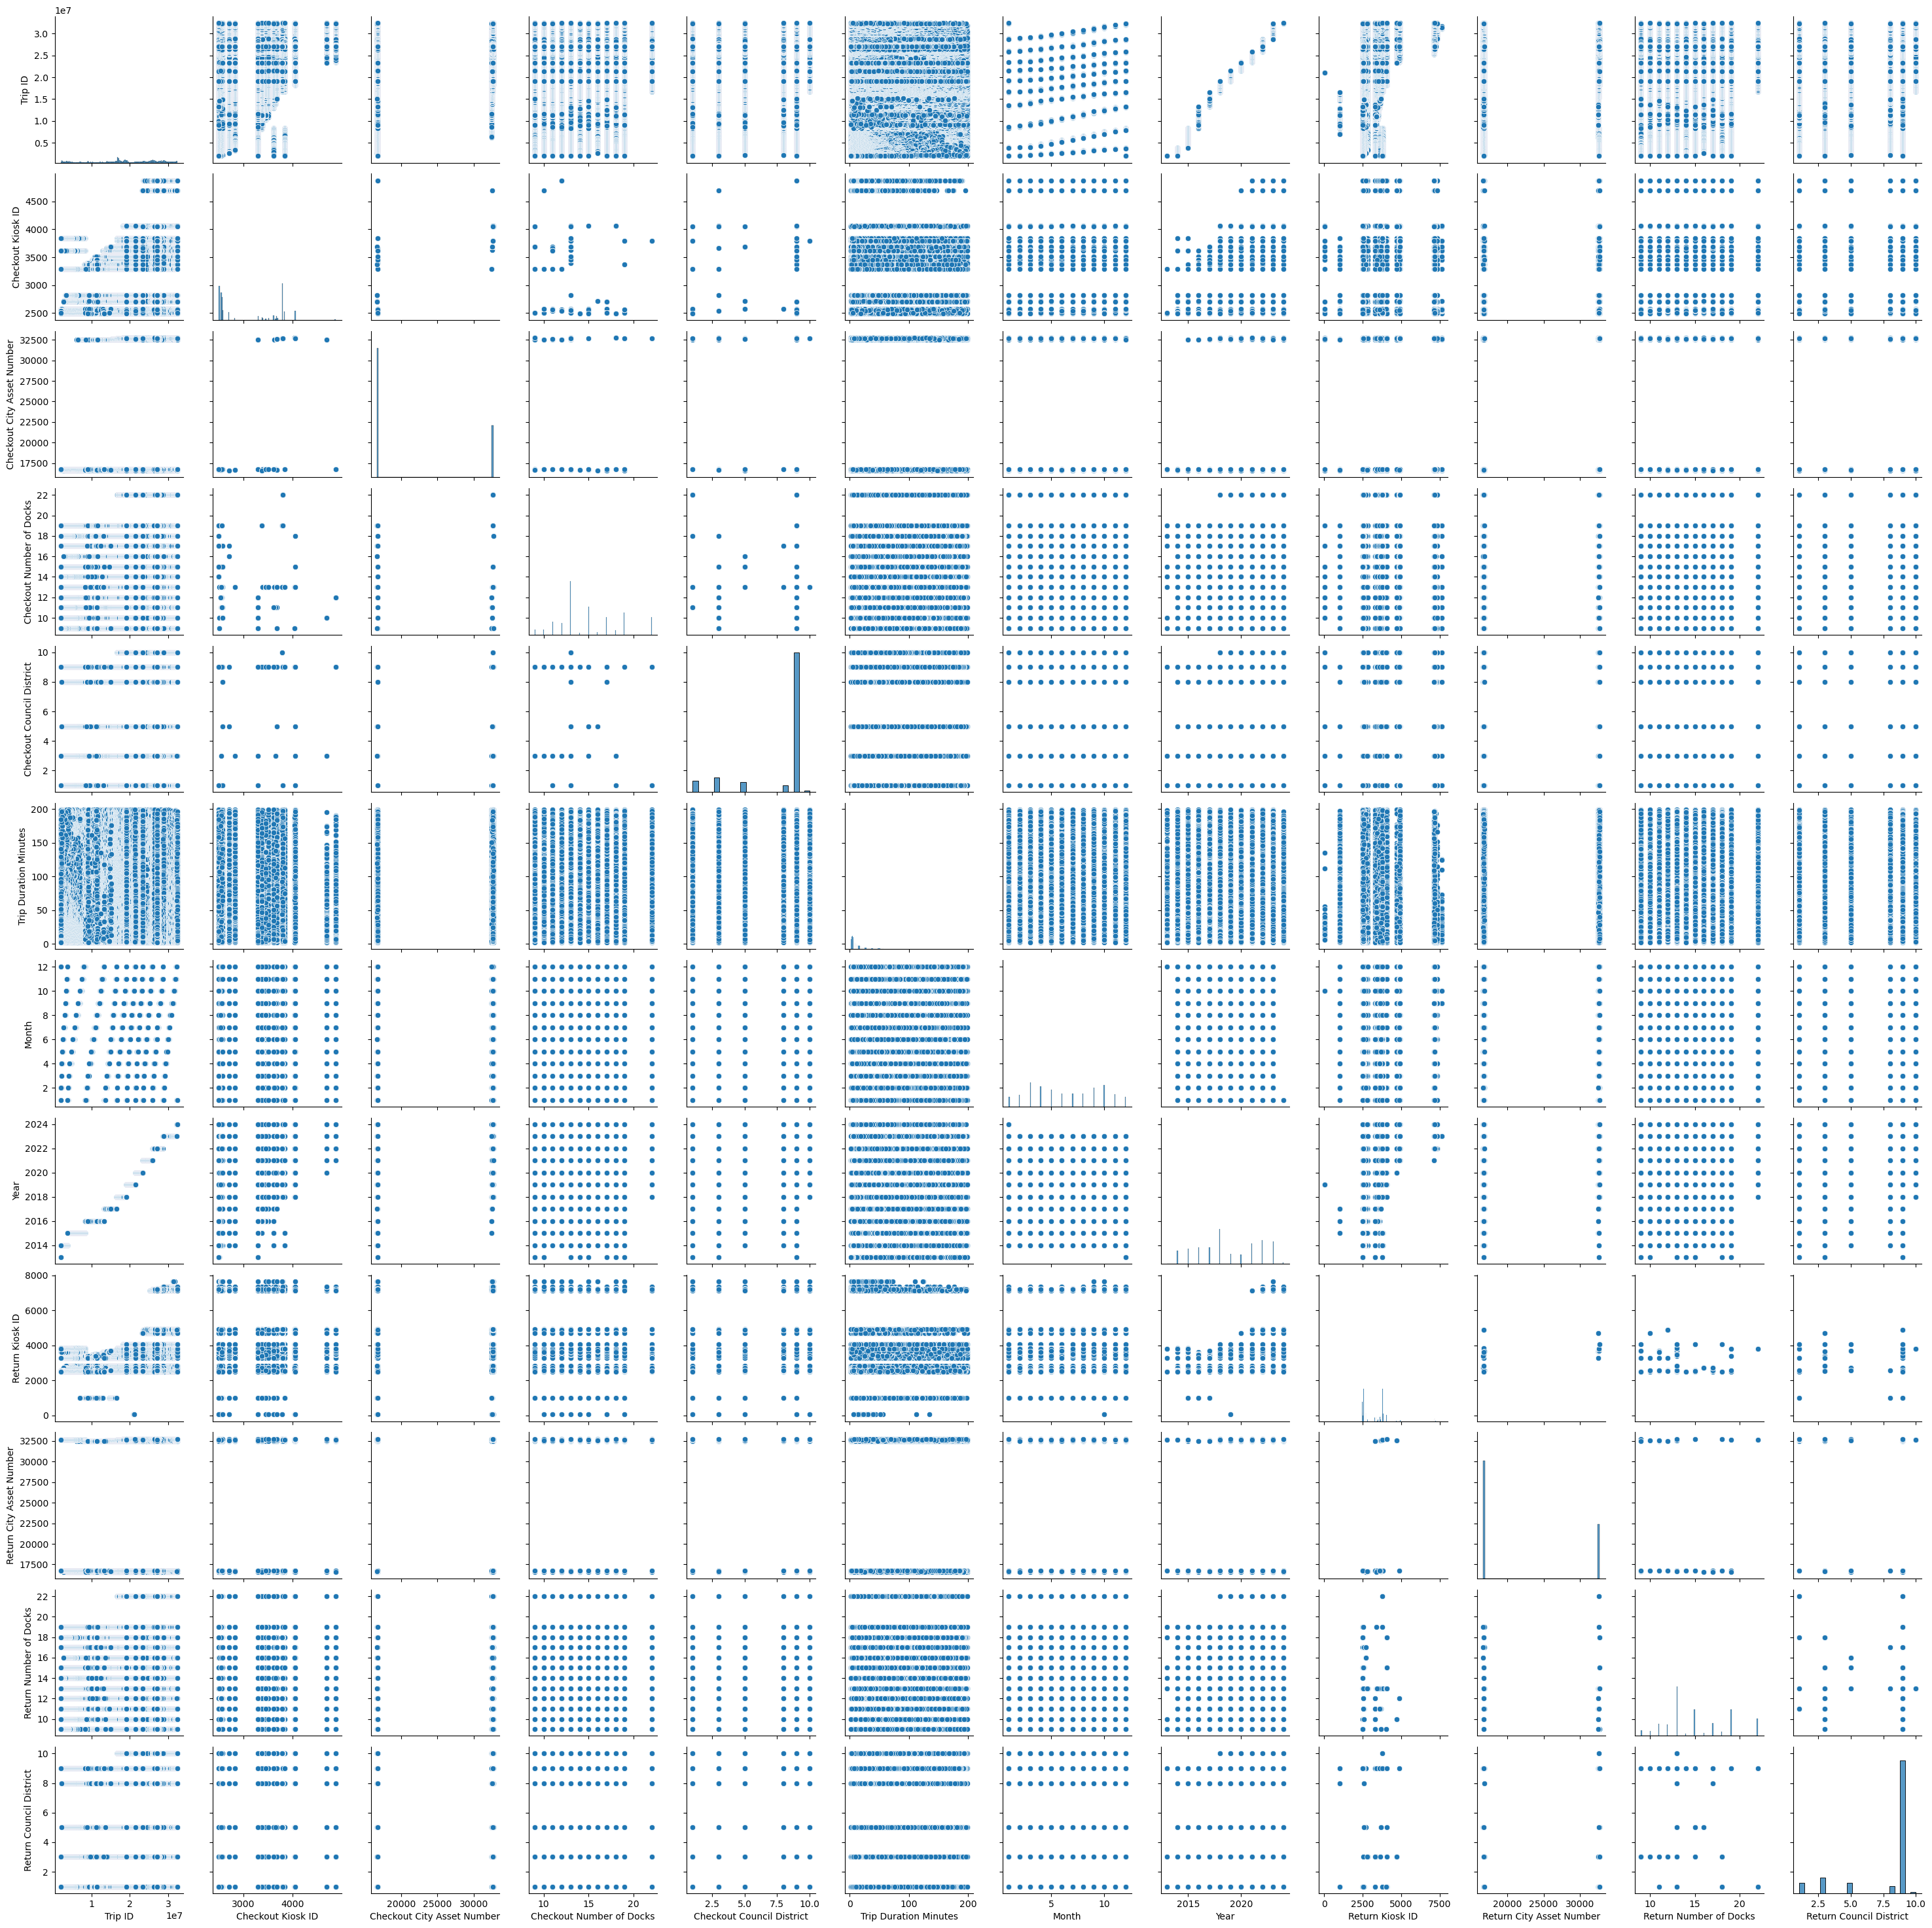

In [46]:
# create a pair plot 
sns.pairplot(suba_num)

Text(0, 0.5, 'Trip Length')

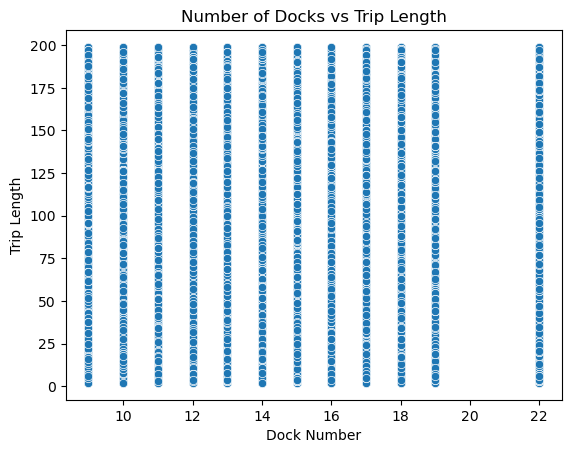

In [22]:
# create a scatter plot of trip length vs number of docks at checkout kiosk

sns.scatterplot(x ='Checkout Number of Docks', y = 'Trip Duration Minutes', data = CODocks_full)
plt.title('Number of Docks vs Trip Length')
plt.xlabel('Number of Docks')
plt.ylabel('Trip Length')


## 4. Linear Regression Analysis

In [23]:
# reshape the variables to form arrays
x = CODocks_full['Checkout Number of Docks'].values.reshape(-1,1)
y = CODocks_full['Trip Duration Minutes'].values.reshape(-1,1)

In [24]:
x

array([[14.],
       [15.],
       [13.],
       ...,
       [13.],
       [13.],
       [17.]])

In [25]:
y

array([[ 3],
       [14],
       [29],
       ...,
       [ 8],
       [28],
       [ 5]], dtype=int64)

In [26]:
# split data into training and tests sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [27]:
# regression analysis of trip length and number of docks at checkout

regression = LinearRegression()
regression.fit(x_train, y_train)
y_predicted = regression.predict(x_test)

Text(0, 0.5, 'Trip Length')

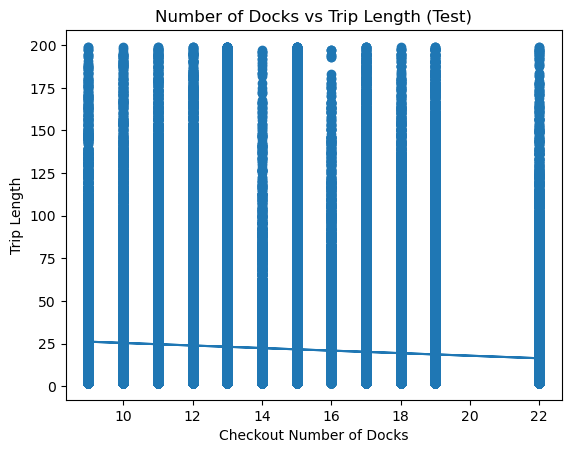

In [30]:
# create regression plot
plt.scatter(x =x_test, y = y_test)
plt.plot(x_test, y_predicted)
plt.title('Number of Docks vs Trip Length (Test)')
plt.xlabel('Checkout Number of Docks')
plt.ylabel('Trip Length')

In [50]:
# compare actual vs predicted values with new data frame

compare=pd.DataFrame({'Actual Test': y_test.flatten(), 'Predicted Test': y_predicted.flatten()})
compare.head(20)

# The predicted values vary greatly from the actual values

,Actual Test,Predicted Test
0,2,23.193072
1,58,20.200724
2,7,23.193072
3,54,23.193072
4,26,23.193072
5,14,23.193072
6,19,21.696898
7,18,21.696898
8,7,26.185420
9,5,23.193072


In [36]:
# find model summary statistics for test values

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print('Slope:', regression.coef_)
print('Mean Squared Error:', mse)
print('R2:', r2)

Slope: [[-0.74808706]]
Mean Squared Error: 643.4938015833943
R2: 0.010298000969011456


Text(0, 0.5, 'Trip Length')

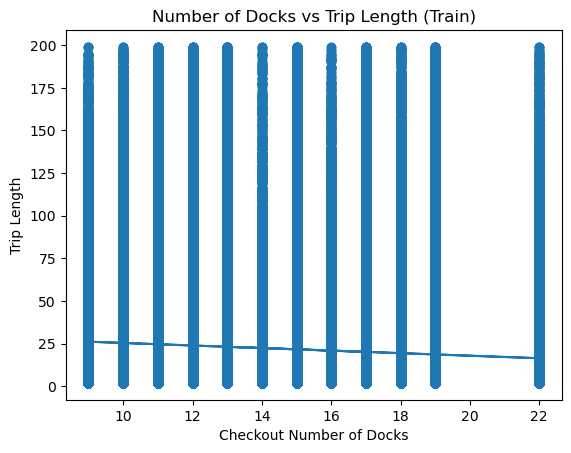

In [47]:
# predict y values for training data and plot

y_predicted_train = regression.predict(x_train)

plt.scatter(x =x_train, y = y_train)
plt.plot(x_train, y_predicted_train)
plt.title('Number of Docks vs Trip Length (Train)')
plt.xlabel('Checkout Number of Docks')
plt.ylabel('Trip Length')

In [48]:
# find model summary statistics for train values

mse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

print('Slope:', regression.coef_)
print('Mean Squared Error:', mse_train)
print('R2:', r2_train)

Slope: [[-0.74808706]]
Mean Squared Error: 650.1545510447489
R2: 0.01014311110641719


##### The summary statistics for the training vs test data are almost identical. The mean squared errors are ~650 and the R2 values are 0.01. The linear regression does not fit or predict the data well.